# PROSPER LOAN DATA ANALYSIS

## INTRODUCTION

This project is on a data set from Prosper, which is America’s first marketplace lending platform, with over $7 billion in funded loans. The main purpose of this project is to summarize the characteristics of variables that can affect the loan status and to get some ideas about the relationships among multiple variables using summary statistics and data visualizations

## DATA WRANGLING

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing our dataset
loan_data = pd.read_csv("prosperLoanData.csv")
loan_data

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information some of which will not be necessary for this analysis. 

## Data Assesment

In [3]:
#Let's sample the data
loan_data.sample(50)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
90696,E7B6337256422618136CA1D,56472,2006-11-02 19:03:22.663000000,C,36,Completed,2008-08-05 00:00:00,0.15693,0.1498,0.1398,...,-81.10,0.0,0.00,0.00,0.0,1.0000,0,0,0.00,232
41516,8C7B35930803896188B014A,1003526,2013-11-07 17:23:27.080000000,NaN,36,Current,NaN,0.18020,0.1440,0.1340,...,-36.95,0.0,0.00,0.00,0.0,1.0000,0,0,0.00,154
72268,E0153600253439449783135,1170279,2014-01-30 08:33:56.187000000,NaN,36,Current,NaN,0.19859,0.1620,0.1520,...,-6.52,0.0,0.00,0.00,0.0,1.0000,0,0,0.00,1
15400,1A09359043316136619DC7B,932509,2013-10-01 10:37:26.470000000,NaN,60,Current,NaN,0.18197,0.1585,0.1485,...,-49.72,0.0,0.00,0.00,0.0,1.0000,0,0,0.00,1
21873,8DD6357407067399874791D,738016,2013-03-26 14:43:54.250000000,NaN,60,Current,NaN,0.17522,0.1519,0.1419,...,-129.33,0.0,0.00,0.00,0.0,1.0000,0,0,0.00,212
19189,8C2A3589134035643AE6DCC,920588,2013-09-23 13:20:06.623000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-14.07,0.0,0.00,0.00,0.0,1.0000,0,0,0.00,1
100514,56C93467147017546C34193,430224,2009-10-25 17:02:11.760000000,NaN,36,Completed,2010-03-05 00:00:00,0.37453,0.3500,0.3400,...,-6.26,0.0,0.00,0.00,0.0,1.0000,0,0,0.00,57
74501,8E3F3430458006544985195,388134,2008-08-25 17:05:15.377000000,B,36,Completed,2008-11-28 00:00:00,0.18814,0.1699,0.1599,...,-1.83,0.0,0.00,0.00,0.0,1.0000,0,0,0.00,22
7358,54EE34313993553391926C5,394800,2008-09-08 13:50:02.393000000,B,36,Chargedoff,2009-03-18 00:00:00,0.17344,0.1590,0.1490,...,-5.34,0.0,6356.75,6356.75,0.0,1.0000,0,0,0.00,166
46840,62B83584450043996BA03FD,846803,2013-07-22 09:53:37.247000000,NaN,36,Current,NaN,0.34045,0.3006,0.2906,...,-14.45,0.0,0.00,0.00,0.0,1.0000,0,0,0.00,11


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [7]:
loan_data.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


**Features of Interest in this project**

The dataset contains a lot of variables. However, I have selected the ones listed below as they represent my goals for this analysis. 

1. ListingCreationDate
2. ListingCategory(numeric)
3. BorrowerState
4. isBorrowerHomeowner
5. IncomeRange
6. IncomeVerifiable
7. DebtToIncomeRatio
8. StatedMonthlyIncome
9. ProsperRating
10. Term
11. EmploymentStatus
12. LoanOriginalAmount
13. BorrowerAPR

# **Data Cleaning**

In this section I will be creating a new data frame from the features that I have identified in my assesment, cleaning the data to facilitate my analysis. 

In [8]:
#First let's create a copy of the original dataset
loan_data_clean = loan_data.copy()

Step 1: Let's create a list containing our features

In [9]:
#Let's create a list containing our features
features = ['ListingCreationDate', 'ListingCategory (numeric)', 'BorrowerState', 'IsBorrowerHomeowner',
            'IncomeRange', 'IncomeVerifiable', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'Term',
            'ProsperRating (Alpha)','EmploymentStatus', 'LoanStatus', 'LoanOriginalAmount', 'BorrowerAPR']

In [10]:
#Creating a new dataframe that contains the features 
loans = loan_data_clean[features]
loans

,ListingCreationDate,ListingCategory (numeric),BorrowerState,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR
0,2007-08-26 19:09:29.263000000,0,CO,True,"$25,000-49,999",True,0.17,3083.333333,36,NaN,Self-employed,Completed,9425,0.16516
1,2014-02-27 08:28:07.900000000,2,CO,False,"$50,000-74,999",True,0.18,6125.000000,36,A,Employed,Current,10000,0.12016
2,2007-01-05 15:00:47.090000000,0,GA,False,Not displayed,True,0.06,2083.333333,36,NaN,Not available,Completed,3001,0.28269
3,2012-10-22 11:02:35.010000000,16,GA,True,"$25,000-49,999",True,0.15,2875.000000,36,A,Employed,Current,10000,0.12528
4,2013-09-14 18:38:39.097000000,2,MN,True,"$100,000+",True,0.26,9583.333333,36,D,Employed,Current,15000,0.24614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,2013-04-14 05:55:02.663000000,1,IL,True,"$50,000-74,999",True,0.13,4333.333333,36,C,Employed,Current,10000,0.22354
113933,2011-11-03 20:42:55.333000000,7,PA,True,"$75,000-99,999",True,0.11,8041.666667,36,A,Employed,FinalPaymentInProgress,2000,0.13220
113934,2013-12-13 05:49:12.703000000,1,TX,True,"$25,000-49,999",True,0.51,2875.000000,60,D,Employed,Current,10000,0.23984
113935,2011-11-14 13:18:26.597000000,2,GA,True,"$25,000-49,999",True,0.48,3875.000000,60,C,Full-time,Completed,15000,0.28408


In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   BorrowerState              108422 non-null  object 
 3   IsBorrowerHomeowner        113937 non-null  bool   
 4   IncomeRange                113937 non-null  object 
 5   IncomeVerifiable           113937 non-null  bool   
 6   DebtToIncomeRatio          105383 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   Term                       113937 non-null  int64  
 9   ProsperRating (Alpha)      84853 non-null   object 
 10  EmploymentStatus           111682 non-null  object 
 11  LoanStatus                 113937 non-null  object 
 12  LoanOriginalAmount         113937 non-null  int64  
 13  BorrowerAPR                11

**Quality Issues**

1. There seems to be some duplicated columns from my visual assesment
2. ListingCreationDate is an object instead of datetime
3. ListingCategory (numeric) and ProsperRating (Alpha) can be reassigned with column names that are easier to work with.
5. Not employed entries in IncomeRange could be safely replaced with 0.

Step 2: Tackling the quality issues

1. There seems to be some duplicated columns from my visual assesment

In [12]:
#checking for  duplicates
loans.duplicated().sum()


871

There are 871 duplicates in the data

In [13]:
#Let's remove the duplicates
loans.drop_duplicates()

,ListingCreationDate,ListingCategory (numeric),BorrowerState,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR
0,2007-08-26 19:09:29.263000000,0,CO,True,"$25,000-49,999",True,0.17,3083.333333,36,NaN,Self-employed,Completed,9425,0.16516
1,2014-02-27 08:28:07.900000000,2,CO,False,"$50,000-74,999",True,0.18,6125.000000,36,A,Employed,Current,10000,0.12016
2,2007-01-05 15:00:47.090000000,0,GA,False,Not displayed,True,0.06,2083.333333,36,NaN,Not available,Completed,3001,0.28269
3,2012-10-22 11:02:35.010000000,16,GA,True,"$25,000-49,999",True,0.15,2875.000000,36,A,Employed,Current,10000,0.12528
4,2013-09-14 18:38:39.097000000,2,MN,True,"$100,000+",True,0.26,9583.333333,36,D,Employed,Current,15000,0.24614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,2013-04-14 05:55:02.663000000,1,IL,True,"$50,000-74,999",True,0.13,4333.333333,36,C,Employed,Current,10000,0.22354
113933,2011-11-03 20:42:55.333000000,7,PA,True,"$75,000-99,999",True,0.11,8041.666667,36,A,Employed,FinalPaymentInProgress,2000,0.13220
113934,2013-12-13 05:49:12.703000000,1,TX,True,"$25,000-49,999",True,0.51,2875.000000,60,D,Employed,Current,10000,0.23984
113935,2011-11-14 13:18:26.597000000,2,GA,True,"$25,000-49,999",True,0.48,3875.000000,60,C,Full-time,Completed,15000,0.28408


2. ListingCreationDate is an object instead of datetime

In [14]:
loans.ListingCreationDate = pd.to_datetime(loans.ListingCreationDate)
loans.info()

C:\Users\user\AppData\Local\Temp\ipykernel_6696\1242929691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans.ListingCreationDate = pd.to_datetime(loans.ListingCreationDate)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   ListingCategory (numeric)  113937 non-null  int64         
 2   BorrowerState              108422 non-null  object        
 3   IsBorrowerHomeowner        113937 non-null  bool          
 4   IncomeRange                113937 non-null  object        
 5   IncomeVerifiable           113937 non-null  bool          
 6   DebtToIncomeRatio          105383 non-null  float64       
 7   StatedMonthlyIncome        113937 non-null  float64       
 8   Term                       113937 non-null  int64         
 9   ProsperRating (Alpha)      84853 non-null   object        
 10  EmploymentStatus           111682 non-null  object        
 11  LoanStatus                 113937 non-null  object  

3. ListingCategory (numeric) and ProsperRating (Alpha) can be reassigned with column names that are easier to work with.

In [15]:
loans = loans.rename(columns = {'ListingCategory (numeric)':'ListingCategory','ProsperRating (Alpha)':'ProsperRating' })
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ListingCreationDate  113937 non-null  datetime64[ns]
 1   ListingCategory      113937 non-null  int64         
 2   BorrowerState        108422 non-null  object        
 3   IsBorrowerHomeowner  113937 non-null  bool          
 4   IncomeRange          113937 non-null  object        
 5   IncomeVerifiable     113937 non-null  bool          
 6   DebtToIncomeRatio    105383 non-null  float64       
 7   StatedMonthlyIncome  113937 non-null  float64       
 8   Term                 113937 non-null  int64         
 9   ProsperRating        84853 non-null   object        
 10  EmploymentStatus     111682 non-null  object        
 11  LoanStatus           113937 non-null  object        
 12  LoanOriginalAmount   113937 non-null  int64         
 13  BorrowerAPR   

4. Not employed entries in IncomeRange could be safely replaced with 0.


In [16]:
loans.IncomeRange = loans.IncomeRange.str.replace('Not employed', '$0')

## Exploratory Data Analysis

In this section, I will be exploring univariate, bivariate and multivariate visualizations.

# **Univariate Analysis**

**Question 1: How are the values for Debt-to-income ratio distributed, are borrowers taking more debt than their income could possibly handle?**

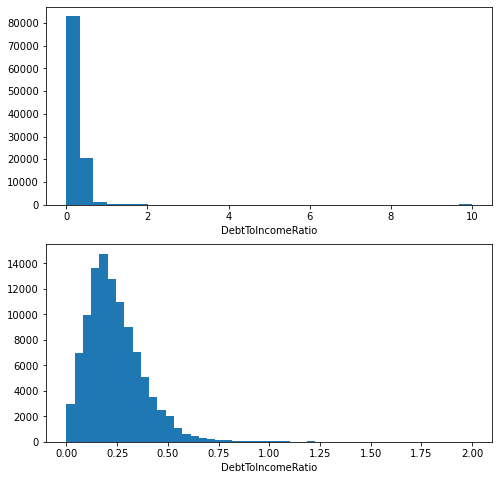

In [17]:
#Plotting a figure with 30 bins
plt.figure(figsize=(8, 8))
plt.subplot(2,1,1)
plt.hist(data=loans, x='DebtToIncomeRatio', bins=30)
plt.xlabel('DebtToIncomeRatio');

bins = np.linspace(0, 2, 50)
plt.subplot(2,1,2)
plt.hist(data=loans, x='DebtToIncomeRatio', bins=bins)
plt.xlabel('DebtToIncomeRatio');

The distribution is positively skewed. This means that borrowers do not borrow beyond their income. The zoomed bar chart shows most borrowers have maintained debt ratios of between 0.20 and 0.25.

**Question Two: How are monthly incomes distributed among borrowers?**

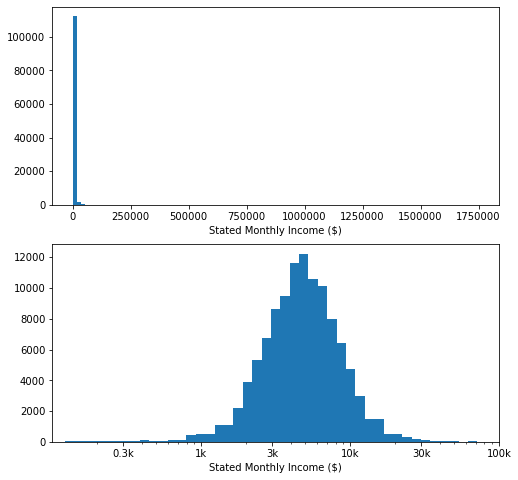

In [18]:
#Plotting a subplot 
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.ticklabel_format(style='plain')
plt.hist(data=loans, x='StatedMonthlyIncome', bins=100)
plt.xlabel('Stated Monthly Income ($)');

#accounting for the severe right skew
plt.subplot(2, 1, 2)
bins_max = np.log10(loans.StatedMonthlyIncome.max())

# Creating 100 evenly transformed bins to hold data groups
bins_trans = 10 ** np.linspace(0, bins_max, 100)
plt.hist(data=loans, x='StatedMonthlyIncome', bins=bins_trans)

# the x axis should be converted to a logarithmic format to make the data a bit clean 
plt.xscale('log')

# Create evenly spaced x-axis
plt.xticks([3e2, 1e3, 3e3, 1e4, 3e4, 1e5], 
           ['0.3k', '1k', '3k', '10k', '30k', '100k']);

plt.xlim(1e2, 1e5)
plt.xlabel('Stated Monthly Income ($)');

The data distribution is positively skewed. This could be due to the presence of some high earners. From the zoomed bar chart, it looks like most earners are in the range of 1000 to 30000.

**Question 3: What is the distribution of loan amounts requested by borrowers?**

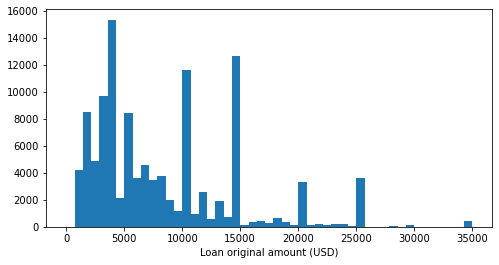

In [19]:
plt.figure(figsize=(8, 4))
bins = np.linspace(0, loans.LoanOriginalAmount.max(), 50)
plt.hist(data=loans, x='LoanOriginalAmount', bins=bins)
plt.xlabel('Loan original amount (USD)');

This shows that most users are in the 3000, 10000 and 15000 mark. Past 15000 mark the number drops significantly.

**Question 4: How are Prosper ratings, Income range and Employment status distributed among listings in the dataset?**

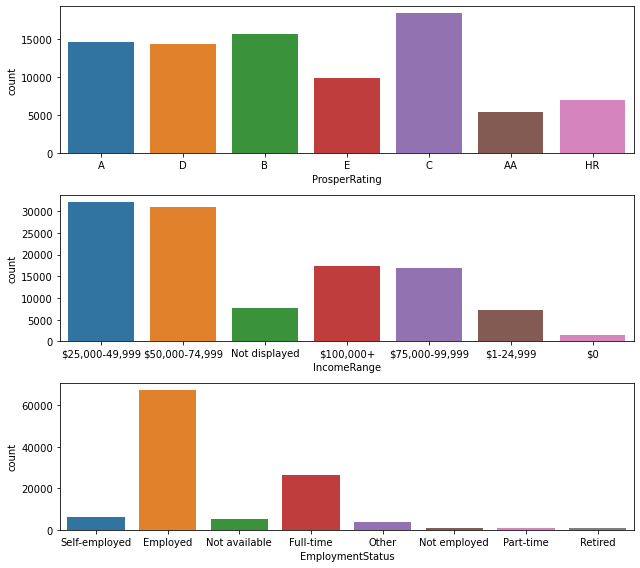

In [20]:
columns = ['ProsperRating', 'IncomeRange', 'EmploymentStatus']

fig, ax = plt.subplots(nrows=3, figsize=(9, 8))

for col, index in zip(columns, range(3)):
    sns.countplot(data=loans, x=loans[col], ax= ax[index])
plt.tight_layout();

C is the most popular rating. Listings rated AA are the least popular. Income range seems to be skewed towards the middle income earners with borrowers between 25000 and 74999 being the majority. This indicates that those people who are employed are most likely to get more loans.

**Question 5: How is the loan status looking like?**

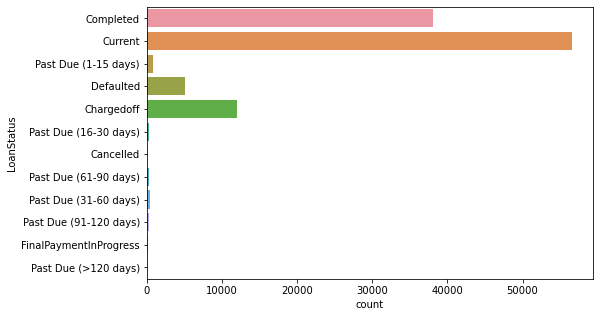

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=loans, y='LoanStatus');

Most of the loans are currently running and are being serviced. A huge chunk of the loans have also been paid off hence completed. 

Question 6: Which state has got a high number of borrowers?

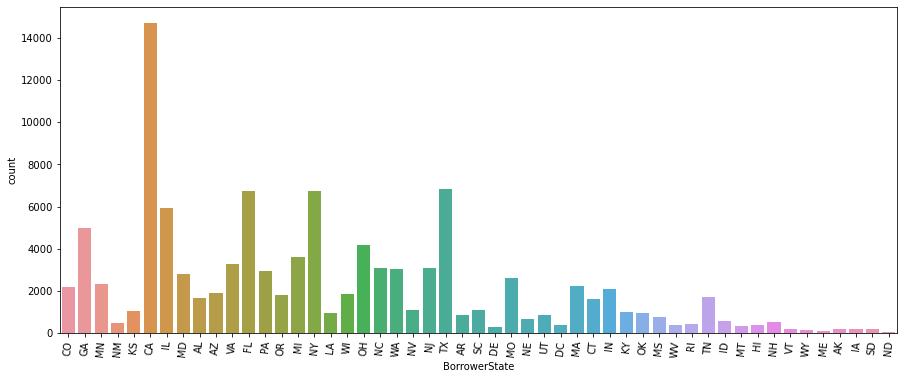

In [22]:
plt.figure(figsize=(15, 6))
sns.countplot(data=loans, x='BorrowerState')
plt.xticks(rotation= 85);

Carlifonia State(CA) has got the highest number of people borrowing loans with over 14000 borrowers.  

# **Bivariate Analysis**

**Question 1: Correlations between DebtToIncomeRatio, StatedMonthlyIncome, LoanOriginalAmount, BorrowerAPR and Term**


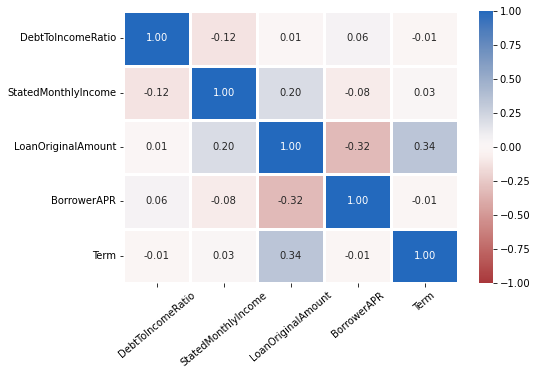

In [23]:
# Creating a list for the columns
numeric_cols = ['DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'BorrowerAPR', 'Term']
# Visualize the correlations  with a heatmap
plt.figure(figsize= (7.5, 5))
sns.heatmap(data=loans[numeric_cols].corr(), annot=True, fmt='.2f', 
            cmap='vlag_r', vmin=-1, vmax=1, linewidth=3)
plt.xticks(rotation=40);

There is a negative correlation between BorrowerAPR and LoanOriginalAmount.
There is a moderate positive correlation between Term and LoanOriginalAmount

**Question 2: What is the relationship between Employment status and the numerical variables: BorrowerAPR, StatedMonthlyIncome, LoanOriginalAmount, DebtToIncomeRatio?**

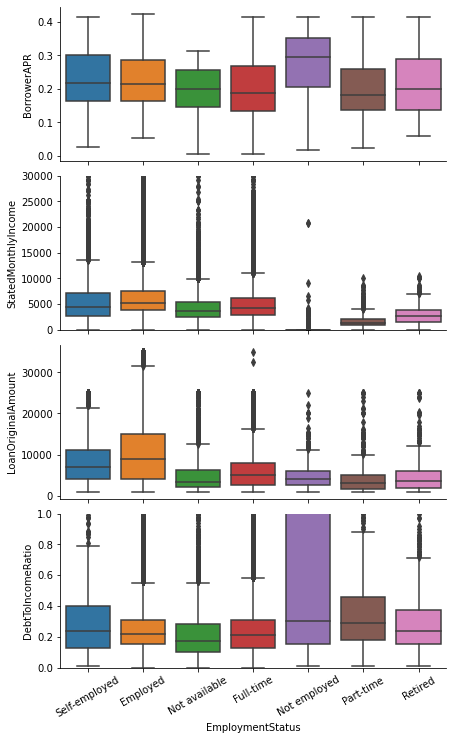

In [24]:
# There is 'Other which needs to be removed'
y_cols = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount','DebtToIncomeRatio']
employment_filter = loans.query('EmploymentStatus != "Other"')

fig = sns.PairGrid(data=employment_filter, y_vars=y_cols, x_vars='EmploymentStatus', aspect=2.5)
fig.map(sns.boxplot)

# Setting the y axis of StatedMonthlyIncome to 0 - 30000
fig.axes[1][0].set_ylim(0, 30000)
# Setting the y axis of DebtToIncome ratio to 0 - 1
fig.axes[3][0].set_ylim(0, 1)
plt.xticks(rotation=30);

The  employed, full-time employed, and self-employed borrowers have higher monthly incomes, obtain higher loan amounts, and enjoy lower Borrower APRs than the part-time, retired, and unemployed borrowers.
The Employed also have lower debt-to-income-ratios.

**Question 3: Does IncomeRange correlate with ProsperRating and StatedMonthlyIncome?
Is home ownership correlated with higher Prosper ratings?
What is the relationship between EmploymentStatus and ProsperRating?**

To achieve this, I need to create two functions, one to plot the data and the other to calculate the size of the data within the the group columns

In [25]:
#This function creates a clustered bar chart  of prop_col and group_col
def plot_chart(df, group_col, proportion_col, cmap):
        # Call the compute proportion function
    table = calculate(df, group_col, proportion_col)
    # Create Column bar chart
    sns.barplot(data=table, x= group_col, y= 'Total Percentage', hue=proportion_col, palette=cmap)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left", title=proportion_col)

#This function calculates the number of proportions within the grouped columns
def calculate(df, group_col, proportion_col):
      # First group dataframe by group_col and proportion_col
    result = df.groupby([group_col, proportion_col]).agg({proportion_col: 'size'})
    result = result.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    
    # Renaming the results
    result.rename(columns={proportion_col: 'Total Percentage'}, inplace=True)
    result = result.reset_index()
    return result

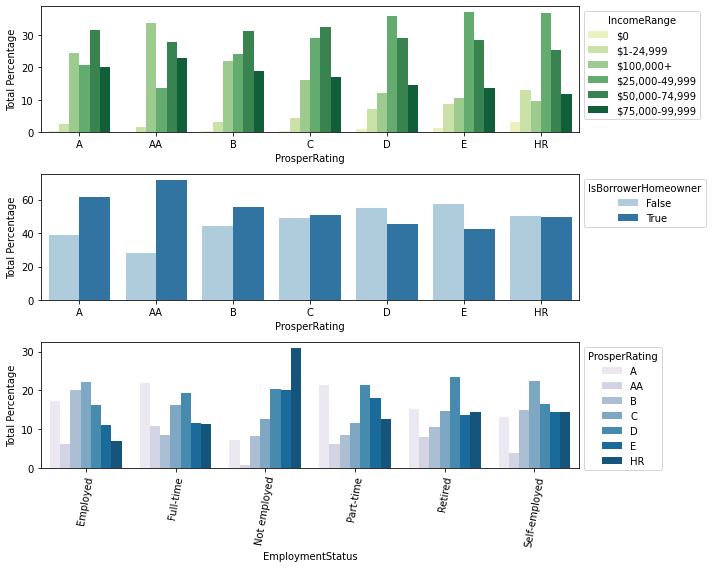

In [26]:
plt.figure(figsize=(10,8))

# ProsperRating vs IncomeRange
plt.subplot(3,1,1)
plot_chart(loans, 'ProsperRating', 'IncomeRange', 'YlGn')

# Prosper Rating vs IsBorrowerHomeowner
plt.subplot(3,1,2)
plot_chart(loans, 'ProsperRating', 'IsBorrowerHomeowner', 'Paired')

# EmploymentStatus vs ProsperRating
plt.subplot(3,1,3)
plot_chart(employment_filter, 'EmploymentStatus', 'ProsperRating', 'PuBu')

plt.xticks(rotation=80)
plt.tight_layout();

From the visualizations above, an increase in ProsperRating causes an increase of high income earners.
HomeOwners also has a positive correlation with ProsperRatings. This could be because homes can be used as assets to acquire loans. 

# **Multivariate Analysis**

**Question 1: What is the relationship between LoanOriginalAmount, ProsperRating and IsBorrowerHomeowner. Do homeowners enjoy higher loans accross board than their counterparts?**

<AxesSubplot:xlabel='ProsperRating', ylabel='LoanOriginalAmount'>

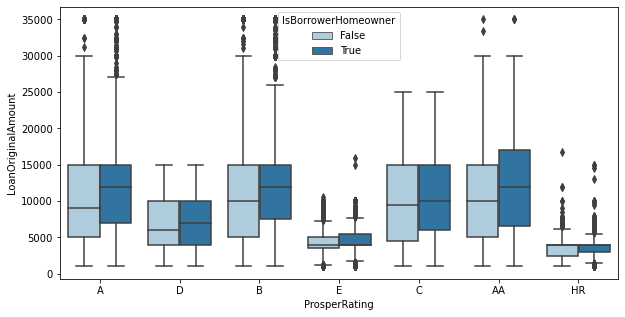

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=loans, x='ProsperRating', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', palette='Paired')

The visualization shows that home owners can get higher loans than the other parties.

**Question 2: What is the relationship between BorrowerAPR, LoanOriginalAmount, and IncomeRange?**

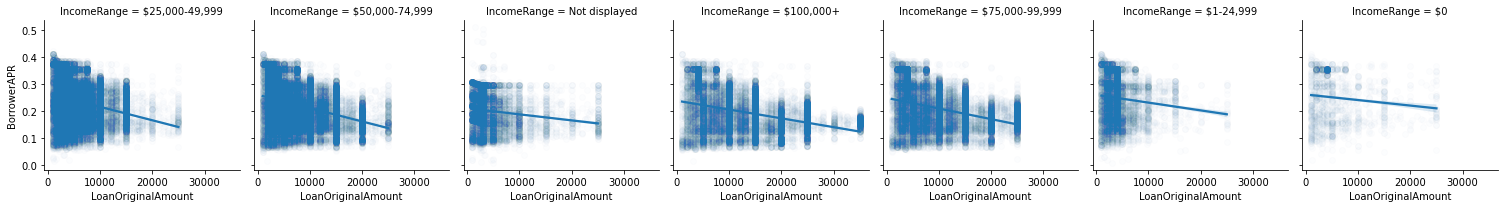

In [28]:
fig = sns.FacetGrid(data=loans, col='IncomeRange')
fig.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', scatter_kws={'alpha': 0.01});

High income earners tend to get larger loans at lower APRs than the low income earners.

**Question 3: What is the relationship between ProsperRating, LoanOriginalAmount, loan Term, and DebtToIncomeRatio**

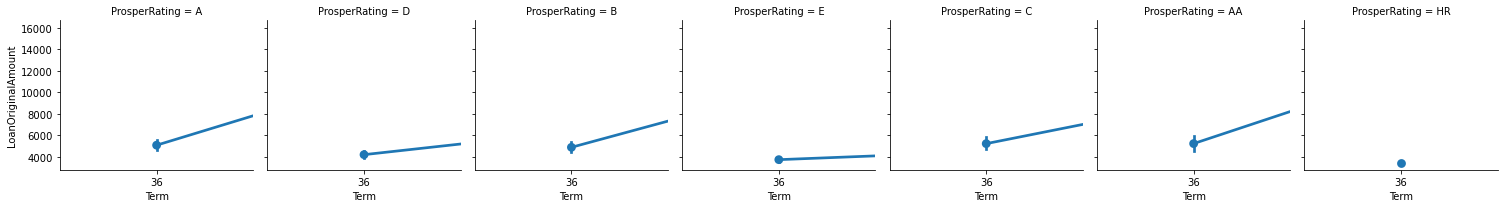

In [29]:
fig = sns.FacetGrid(data=loans, col='ProsperRating')
fig.map(sns.pointplot, 'Term', 'LoanOriginalAmount', order=None);

It looks like people with high prosper ratings tend to greatly increase their loan amounts once they have longer payback terms. 

## **Conclusion**

1. The BorrowerAPR is has a negative correlation with the LoanOriginalAmount, Term and ProsperRating. 
2. ProsperRAting is highly influenced by income, homeownership, debt-to-income ratio and employment status.
3. High income earners seemed to borrow more when long-term loans are involved, increasing their debt to income ratio. Hence, an increase in APR might be a great way to disincentivize 'overborrowing'. On the other hand, decreasing APR by term might be a great way to encourage low-rated borrowers to take long-term loans — those that they would be able to fully repay.
 



## **Limitations**

1. There were some missing values in some columns which could have messed with the accuracy of the analysis.